In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [15]:
dataset = 'model/static_classifier/static_face.csv'
model_save_path = 'model/static_classifier/static_classifier.hdf5'
tflite_save_path = 'model/static_classifier/static_classifier.tflite'

# Dataset reading

In [16]:
df = pd.read_csv(dataset, header=None)
df.columns = ['label'] + [f'feat_{i}' for i in range(len(df.columns)-1)]
df = df.astype(np.float32)
df['label'] = df['label'].astype(np.int32)
df

,label,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255
0,0,0.0,0.0,-0.253968,-0.539683,0.150794,-0.992063,-0.007937,0.063492,-0.007937,...,0.119048,0.190476,0.214286,0.095238,0.182540,0.111111,0.761905,-0.341270,0.555556,-0.531746
1,0,0.0,0.0,-0.267176,-0.496183,0.099237,-0.992366,0.007634,0.076336,0.015267,...,0.167939,0.183206,0.244275,0.091603,0.213740,0.106870,0.870229,-0.427481,0.564885,-0.580153
2,0,0.0,0.0,-0.395683,-0.510791,0.000000,-1.000000,-0.007194,0.071942,-0.007194,...,0.129496,0.172662,0.215827,0.057554,0.165468,0.079137,0.705036,-0.388489,0.460432,-0.568345
3,0,0.0,0.0,-0.355072,-0.528986,0.072464,-1.000000,-0.007246,0.094203,-0.007246,...,0.130435,0.210145,0.217391,0.101449,0.173913,0.115942,0.710145,-0.333333,0.492754,-0.536232
4,0,0.0,0.0,-0.372414,-0.551724,0.082759,-0.986207,-0.020690,0.075862,-0.020690,...,0.103448,0.179310,0.179310,0.089655,0.131034,0.103448,0.606897,-0.303448,0.455172,-0.517241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,4,0.0,0.0,-0.447917,-0.520833,-0.020833,-1.000000,0.000000,0.083333,0.000000,...,0.135417,0.166667,0.208333,0.062500,0.166667,0.083333,0.541667,-0.375000,0.354167,-0.562500
466,4,0.0,0.0,-0.483146,-0.528090,0.033708,-0.977528,-0.011236,0.112360,-0.022472,...,0.089888,0.224719,0.157303,0.146067,0.112360,0.157303,0.471910,-0.146067,0.348315,-0.449438
467,4,0.0,0.0,-0.426829,-0.487805,0.060976,-1.000000,0.000000,0.109756,0.000000,...,0.146341,0.231707,0.256098,0.158537,0.207317,0.170732,0.731707,-0.085366,0.487805,-0.451219
468,4,0.0,0.0,-0.329268,-0.402439,0.073171,-0.951219,0.012195,0.109756,0.000000,...,0.158537,0.207317,0.304878,0.134146,0.256098,0.146341,1.000000,-0.170732,0.573171,-0.512195


In [17]:
print('Label distribution (count): ', df['label'].value_counts())

Label distribution (count):  label
4    146
3    107
2     89
1     69
0     59
Name: count, dtype: int64


In [18]:
print('Label distribution (%): ', df['label'].value_counts()/df.shape[0] * 100)

Label distribution (%):  label
4    31.063830
3    22.765957
2    18.936170
1    14.680851
0    12.553191
Name: count, dtype: float64


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='label'), df['label'], train_size=2/3, random_state=RANDOM_SEED, stratify=df['label'])

# Number of classes infered from dataset

In [20]:
NUM_CLASSES = len(df['label'].unique())

# Model building

In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((df.shape[1] - 1,)),
    tf.keras.layers.Dense(2048),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dropout(0.05),
    # tf.keras.layers.Dense(16),
    # tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [40]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2048)              526336    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2048)              0         
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               1049088   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 64)               

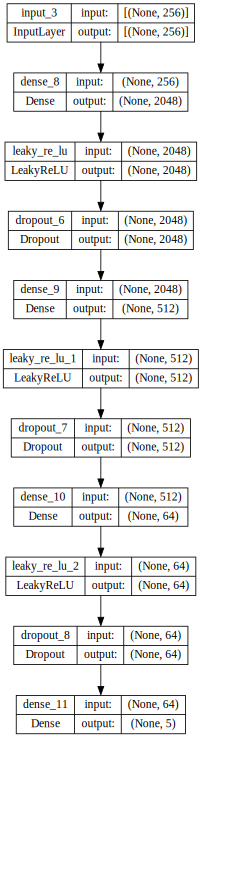

In [41]:
from IPython.display import SVG
from keras.utils import model_to_dot

iv1_dot = model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=60)
SVG(iv1_dot.create(prog=['dot'], format='svg'))

In [42]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [43]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [44]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 9/10 [==========================>...] - ETA: 0s - loss: 1.5326 - accuracy: 0.3576
Epoch 1: saving model to model/static_classifier\static_classifier.hdf5
10/10 [==============================] - 2s 79ms/step - loss: 1.5196 - accuracy: 0.3578 - val_loss: 1.2846 - val_accuracy: 0.4713
Epoch 2/1000
 4/10 [===========>..................] - ETA: 0s - loss: 1.4170 - accuracy: 0.3281

c:\Users\Prometheus\.conda\envs\cv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - ETA: 0s - loss: 1.2875 - accuracy: 0.4313
Epoch 2: saving model to model/static_classifier\static_classifier.hdf5
10/10 [==============================] - 0s 38ms/step - loss: 1.2875 - accuracy: 0.4313 - val_loss: 1.1711 - val_accuracy: 0.4586
Epoch 3/1000
 9/10 [==========================>...] - ETA: 0s - loss: 1.1277 - accuracy: 0.5417
Epoch 3: saving model to model/static_classifier\static_classifier.hdf5
10/10 [==============================] - 0s 49ms/step - loss: 1.1249 - accuracy: 0.5431 - val_loss: 0.9092 - val_accuracy: 0.6051
Epoch 4/1000
 9/10 [==========================>...] - ETA: 0s - loss: 1.0285 - accuracy: 0.5486
Epoch 4: saving model to model/static_classifier\static_classifier.hdf5
10/10 [==============================] - 0s 43ms/step - loss: 1.0206 - accuracy: 0.5559 - val_loss: 0.8422 - val_accuracy: 0.7070
Epoch 5/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.9313 - accuracy: 0.5938
Epoch 5: saving model t

In [45]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 10ms/step - loss: 0.0398 - accuracy: 0.9936


In [46]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [47]:
# Inference test
predict_result = model.predict(np.array([X_test.iloc[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 86ms/step
[3.1212494e-05 1.6265310e-01 5.6855816e-01 2.3478567e-06 2.6875517e-01]
2


# Confusion matrix

5/5 [==============================] - 0s 5ms/step


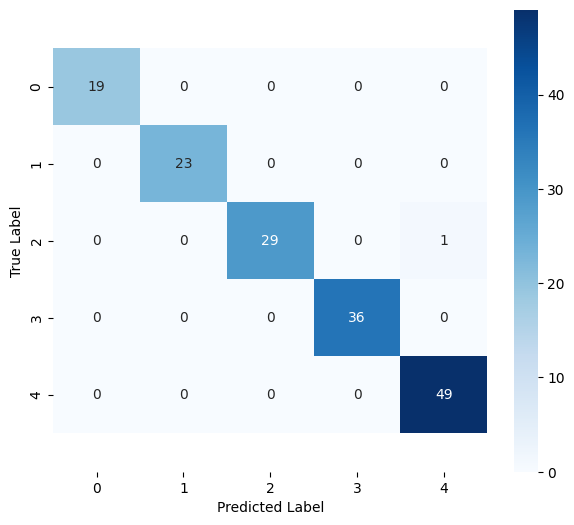

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        23
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        36
           4       0.98      1.00      0.99        49

    accuracy                           0.99       157
   macro avg       1.00      0.99      0.99       157
weighted avg       0.99      0.99      0.99       157



In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', square=False, cmap="Blues")
    
    # Set axis labels
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    
    # Adjust y-axis limits to ensure correct display
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))

# Example usage with your model and test data
# Assuming you have already trained your model and have X_test and y_test
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)


# Convert to model for Tensorflow-Lite

In [49]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\Prometheus\.conda\envs\cv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Prometheus\AppData\Local\Temp\tmpqylmtqp1\assets


INFO:tensorflow:Assets written to: C:\Users\Prometheus\AppData\Local\Temp\tmpqylmtqp1\assets


1620568

# Inference test

In [51]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [52]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [53]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test.iloc[0]]).astype(np.float32))

In [54]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2 ms


In [55]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.2633968e-05 1.4249355e-01 5.3038746e-01 2.6541586e-06 3.2707369e-01]
2
